# **Missing Values:**
*   Missing values are gaps or null entries in a dataset, where information for a particular observation is not available. They can occur for a variety of reasons, such as incomplete data collection, errors during data entry, or respondents skipping certain survey questions.
*   In datasets, missing values are often represented by placeholders like NaN (Not a Number), blanks, or specific indicators (e.g., -9999). Handling missing values is an important step in data cleaning and preprocessing because they can skew analysis and affect the performance of machine learning models.

**Effect if Missing Values:**

Missing values can significantly impact data analysis in several ways:

1. **Loss of Information:** Missing data reduces the available dataset size, potentially making analysis less reliable or inconclusive.

2. **Bias in Results:** If the missing values are not random (i.e., they depend on the value of another variable), they can introduce bias, leading to skewed results and incorrect conclusions. In a dataset out of 10K records 5K Male's wt and ht is available and 5K Female's wt and ht is available. But out of 5K females in 4K records data is missing. So analysis will be biased towards male category.

3. **Reduced Accuracy:** Machine learning models and statistical tests often perform poorly when trained on datasets with missing values, reducing the accuracy of predictions and insights.

4. **Increased Complexity:** Handling missing values typically requires additional preprocessing steps like imputation or filtering, which adds complexity and time to the workflow.

5. **Incompatibility with Algorithms:** Many statistical algorithms and machine learning models cannot handle missing data directly, leading to errors unless the missing values are addressed.

Effectively managing missing values is crucial for robust and meaningful data analysis.

**Types of Missing Values:**

Missing values in a dataset can be categorized based on their underlying mechanism and the reason for their occurrence. There are three main types:

1. **Missing Completely at Random (MCAR):**

      These missing values have no relationship to any other data in the dataset. The occurrence is purely random and does not depend on the values of any variables.

      **Example:** If survey participants accidentally skip a question, it can lead to MCAR.

      **Impact:** Less bias in analysis, as the missing values are truly random.

2. **Missing at Random (MAR):**

      These missing values depend on the observed data but not on the missing data itself.

      **Example:** If income data is more likely to be missing for younger respondents, the missingness is related to the age variable.

      **Impact:** Can introduce bias if not properly addressed, but imputation methods can often handle MAR effectively.

3. **Missing Not at Random (MNAR):**

      These missing values depend on the missing data itself or unobserved variables. The missingness is systematic and often related to the variable being studied.

      **Example:** If people with higher incomes choose not to disclose their income, the missingness is related to the income variable.

      **Impact:** Creates significant bias and is challenging to address without external knowledge or assumptions.

Understanding the type of missing values in your dataset is crucial for selecting appropriate methods to handle them.

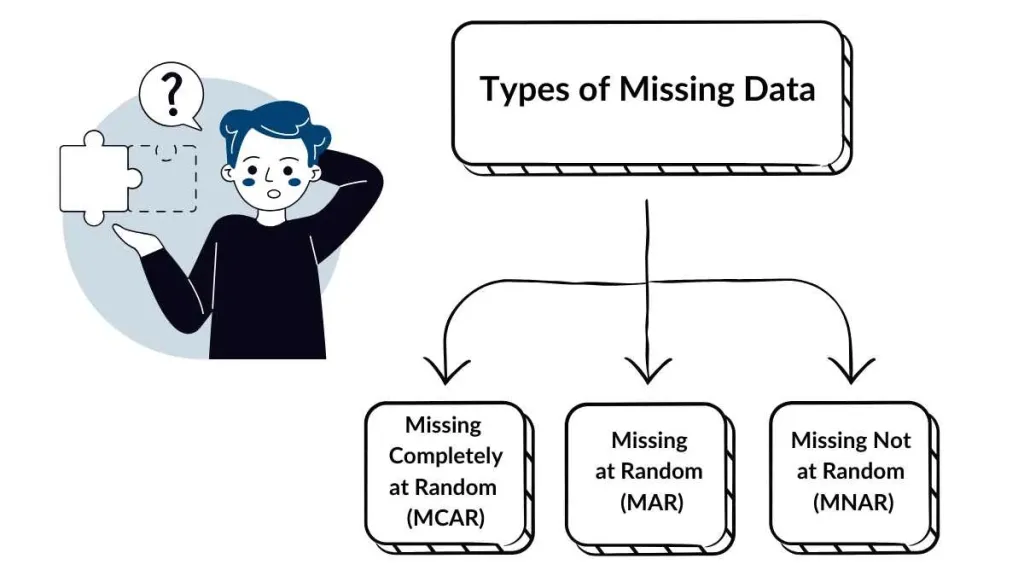

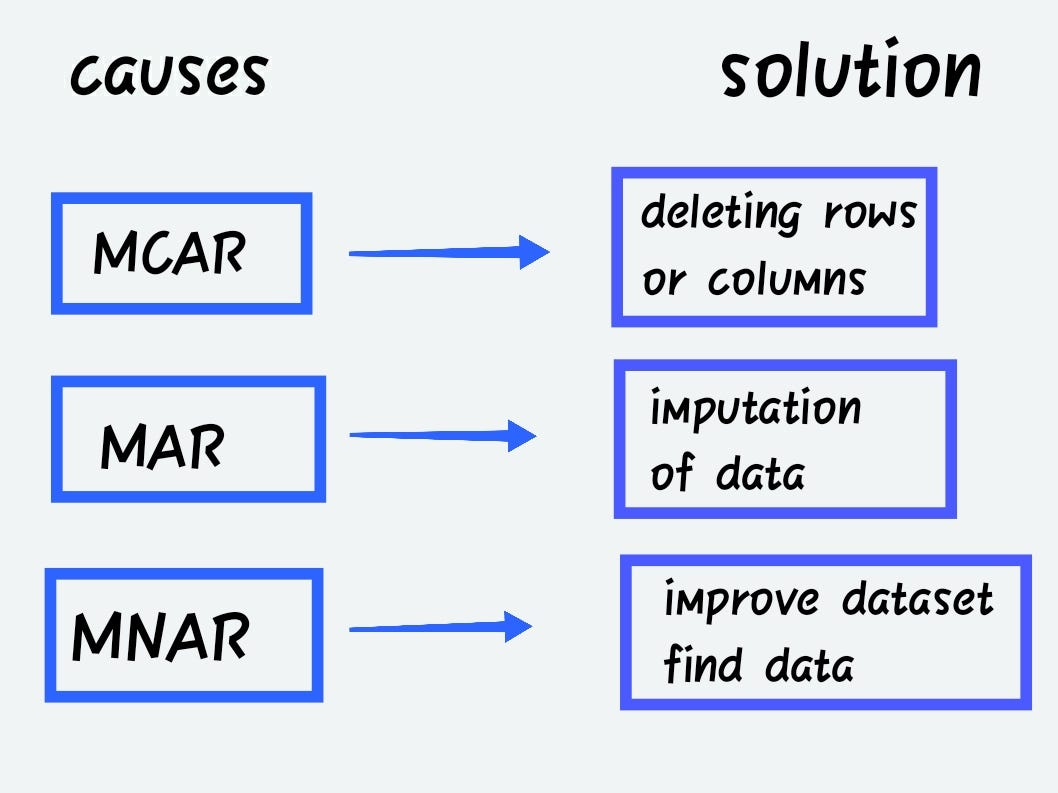

# **Handling Missing Values:**

1. **Remove Missing Data**

      Listwise Deletion: Drop rows or columns with missing values if they represent a small proportion of the dataset.

      Suitable when the amount of missing data is minimal.

      Drawback: Can result in loss of valuable information.

2. **Impute Missing Values**

      Mean/Median Imputation: Replace missing values with the mean or median of the column.

      Works for numerical data; median is better for skewed data.

      Mode Imputation: Use the most frequent value for categorical data.

3. **Predict Missing Data**

      Use algorithms like regression or k-Nearest Neighbors (KNN) to estimate and fill missing values based on other variables.

      Example: Fill missing income data using factors like age and education.

4. **Indicator Variables for Missingness**

      Add a binary variable to flag rows with missing values.

      Useful when the presence of missingness itself carries information.

5. **Advanced Techniques**

      Multiple Imputation: Generate multiple datasets by imputing missing values differently and combine the results to account for uncertainty.

      Matrix Factorization: Fill gaps by leveraging patterns in data (e.g., collaborative filtering in recommendation systems).

      Deep Learning Models: Use neural networks to predict missing values.

6. **Leave Missing Values**

      Some algorithms (e.g., tree-based models) handle missing data internally, so no imputation is needed.

The best approach depends on:

*The type of missing values (MCAR, MAR, MNAR).*

*The proportion of missing data.*

*The context of your analysis.*

# **Acceptable Percentage of Missing Values:**

The acceptable percentage of missing values in a dataset depends on the context, type of analysis, and the impact of missing data on results. Here are some general guidelines:

1. **Low Missing Percentage (<5%):**

      Typically considered manageable.

      Standard imputation techniques like mean, median, or mode can be applied without significantly altering the data.

2. **Moderate Missing Percentage (5%-20%):**

      Requires careful attention and may demand more advanced imputation techniques (e.g., interpolation, machine learning methods).

      The choice of technique depends on the nature of the missingness (MCAR, MAR, MNAR).

3. **High Missing Percentage (>20%):**

      Raises concerns about data quality.

      Decisions like removing rows/columns or collecting additional data may be necessary.

      For certain analyses, such as in healthcare or social sciences, datasets with >20% missing values may still be acceptable if robust imputation methods are applied.

4. **Critical Missing Percentage (>50%):**

      Often considered unusable for most analytical tasks unless absolutely essential insights can be derived.

      Imputation methods may not reliably capture the true patterns of the data.

Ultimately, the *acceptable percentage* of missing values depends on the *specific domain, the sample size, and the overall reliability required* for the analysis.

# **Missing value Imputers in Pandas:**



1.   **Fill Missing Values with fillna():**

      Replace missing values with a specific value (e.g., mean, median, mode).

      df['Column'].fillna(df['Column'].mean(), inplace=True)

      df['Column'].fillna(df['Column'].median(), inplace=True)

      
2.   **Interpolate Missing Values:**

      Estimate missing values using interpolation techniques.

      df['Column'] = df['Column'].interpolate(method='linear')
3.   **Replace with the Previous/Next Value**

      Forward-fill (ffill) or backward-fill (bfill) methods to propagate known values.

      df['col'] = df['col'].fillna(method='ffill')



# **Steps in Missing Data Handling:**



1.   Identify Missing Values
2.   Identify the Cause
3.   Identify the Strategy
4.   Implementation of Strategy


# **Let us Work On Data Set:**

In [3]:
# step - 1
# import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# step - 2
# load data from csv file
df=pd.read_csv("/content/heart_disease_uci.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


**Observation:** From above information, it is observed that there are null values/missing values except in the last and first five columns.

In [5]:
# step - 3:
# Let us identify column wise missing values.
df.isnull().any()

,0
id,False
age,False
sex,False
dataset,False
cp,False
trestbps,True
chol,True
fbs,True
restecg,True
thalch,True


**Observation:** In above result the column with missing values are shown with "True".

In [6]:
df.isnull()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


**Observation:** In above result the columns with missing values are shown with "True".

In [7]:
# step - 4:
# Lets find the count of column wise missing values.
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [8]:
# step - 5:
# Lets identify the percentage of column wise missing values.
round((df.isnull().sum()/len(df))*100,2)

,0
id,0.00
age,0.00
sex,0.00
dataset,0.00
cp,0.00
trestbps,6.41
chol,3.26
fbs,9.78
restecg,0.22
thalch,5.98


In [9]:
df=df.drop(columns=["slope","ca","thal"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 93.6+ KB


In [10]:
# Step - 6:
# Let us print count and percentage side by side
pd.DataFrame({"count":df.isnull().sum(),
              "per":round((df.isnull().sum()/len(df))*100,2)})

,count,per
id,0,0.00
age,0,0.00
sex,0,0.00
dataset,0,0.00
cp,0,0.00
trestbps,59,6.41
chol,30,3.26
fbs,90,9.78
restecg,2,0.22
thalch,55,5.98


# **Handling Missing Values Using Simple Imputers**

- Mean/Median Based Filling -----> Real Numerical Data

- Mode Based Filling -----> Categorical/Discrete Numerical Data

In [11]:
# Filling missing values in Numerical Data Column
df["trestbps"]=df["trestbps"].fillna(df["trestbps"].mean())

In [12]:
df["trestbps"].isnull().any()

np.False_

In [13]:
df["fbs"]

,fbs
0,True
1,False
2,False
3,False
4,False
...,...
915,True
916,False
917,True
918,True


In [14]:
# Filling missing values in Categorical Data Column
df["fbs"]=df["fbs"].fillna(df["fbs"].mode())

In [15]:
df["fbs"].isnull().any()

np.True_

In [16]:
df["fbs"].mode()

,fbs
0,False


In [17]:
df["fbs"].mode()[0]

False

In [18]:
df.shape

(920, 13)

In [19]:
df.shape[1]

13

In [20]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [21]:
# step - 7:
# Let us think only about numerical data columns.
dfn=df.select_dtypes(include=["int","float"])
pd.DataFrame({"count":dfn.isnull().sum(),"per":round((dfn.isnull().sum()/len(df))*100,2)})

,count,per
id,0,0.00
age,0,0.00
trestbps,0,0.00
chol,30,3.26
thalch,55,5.98
oldpeak,62,6.74
num,0,0.00


In [22]:
# step - 8:
# Lets only think about categorical data columns
dfc=df.select_dtypes(exclude=["int","float"])
pd.DataFrame({"count":dfc.isnull().sum(),"per":round((dfc.isnull().sum()/len(df))*100,2)})

,count,per
sex,0,0.00
dataset,0,0.00
cp,0,0.00
fbs,90,9.78
restecg,2,0.22
exang,55,5.98


# **Visualizing Missing Values:**

- **Matrix plots** are a fantastic way to visualize missing data patterns across rows and columns in a dataset. The Python library **missingno** is particularly useful for creating these plots.

- A matrix plot highlights the presence or absence of data in each row and column. It can reveal patterns, such as whether missing values are concentrated in specific rows or columns.

<Axes: >

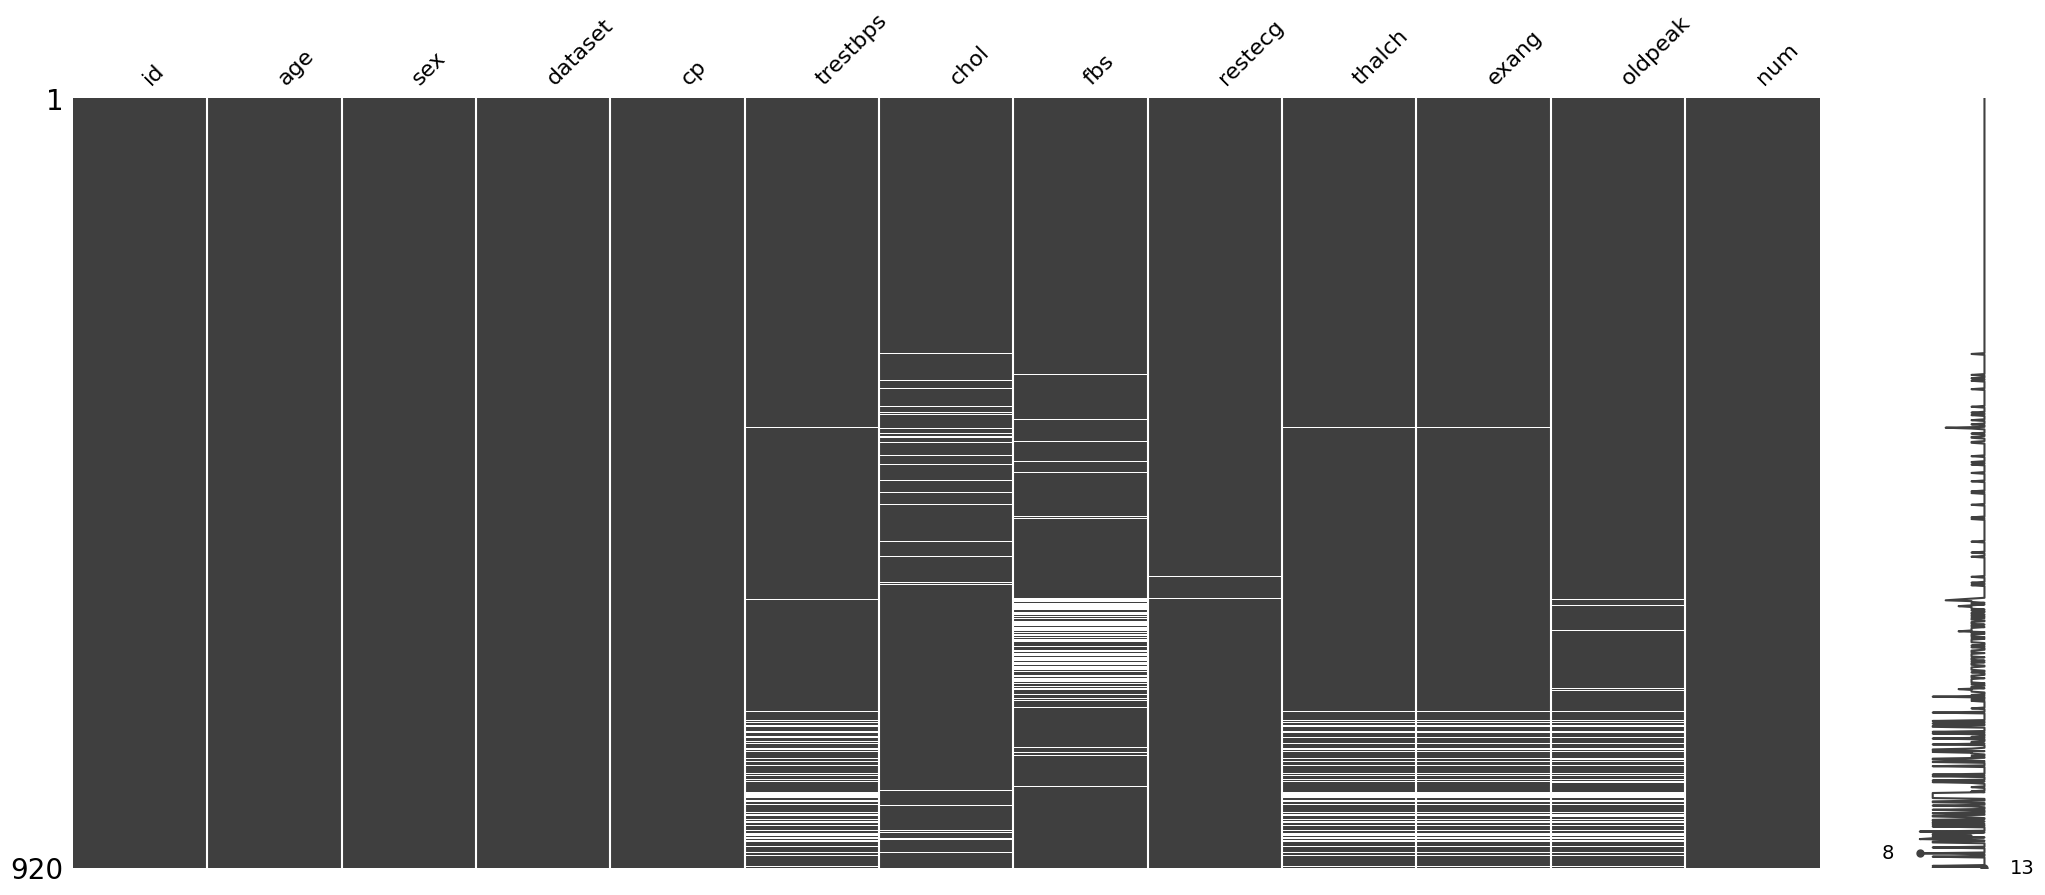

In [13]:
import missingno as msno

# Create a matrix plot
msno.matrix(df)

<Axes: >

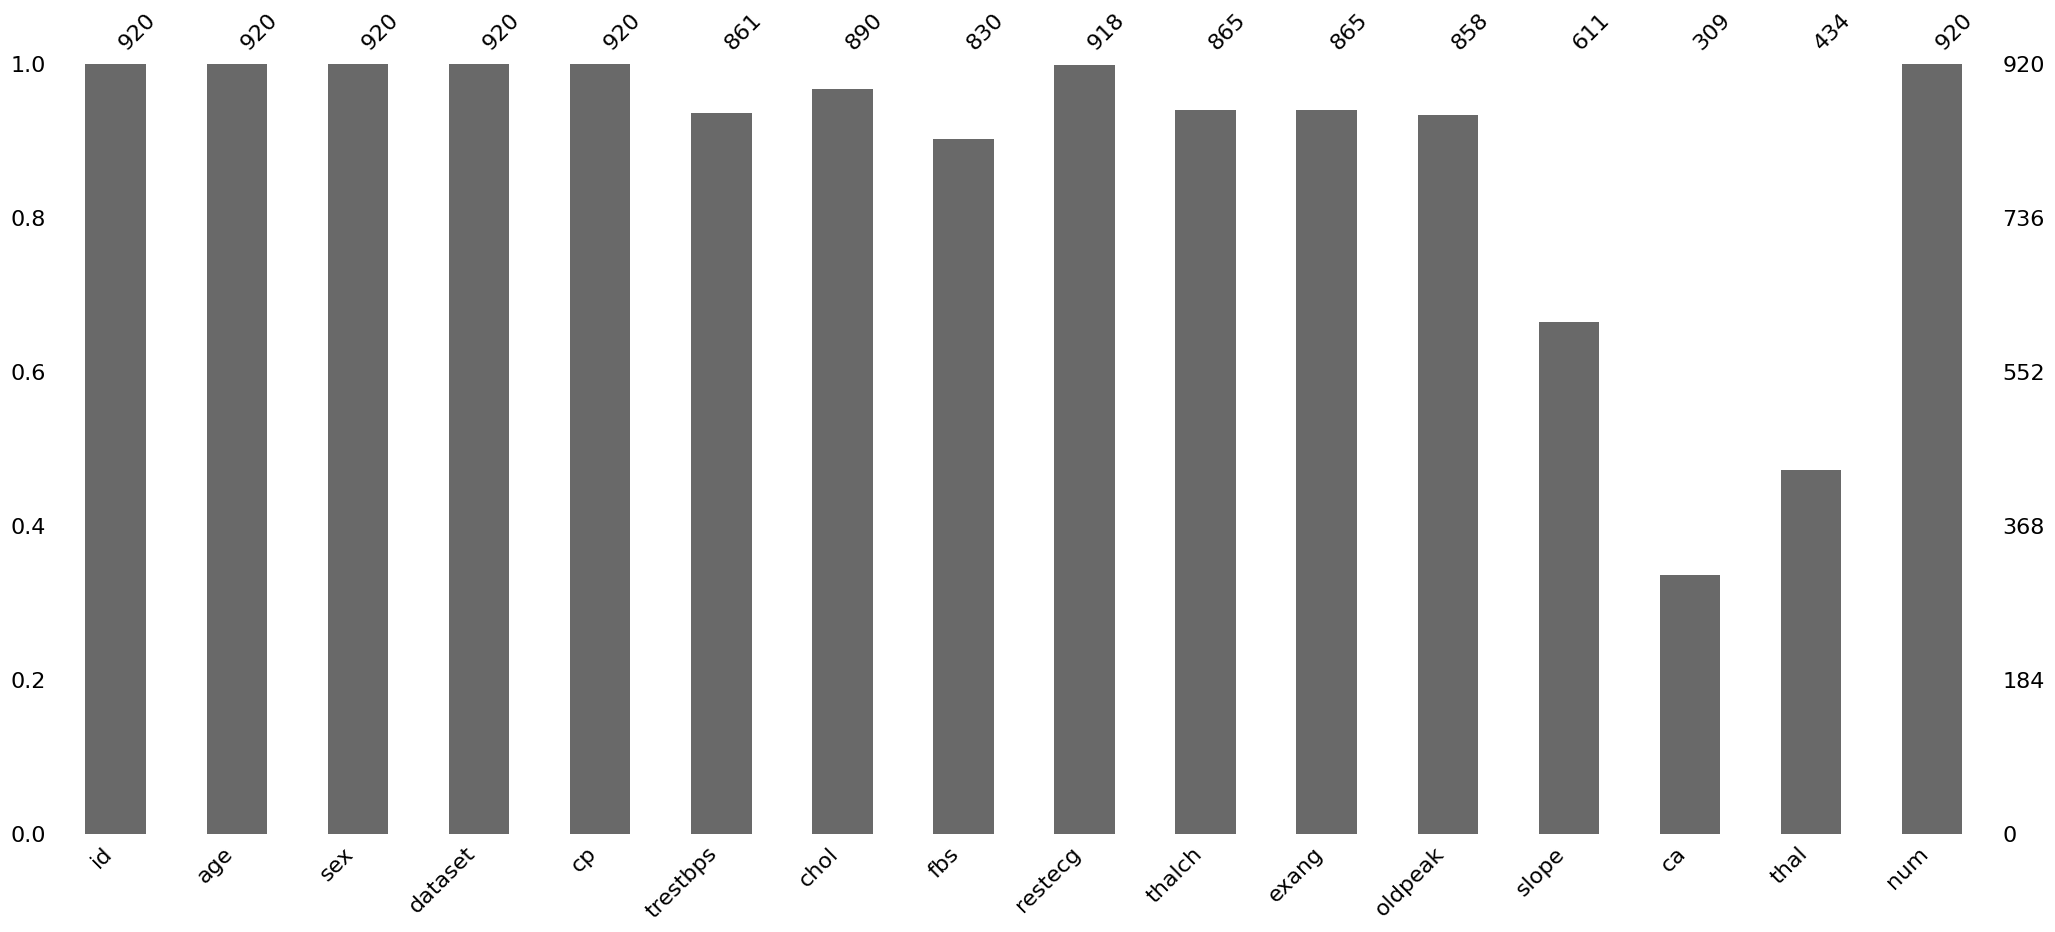

In [ ]:
# Bar plot to identify missing values.
msno.bar(df)

<Axes: >

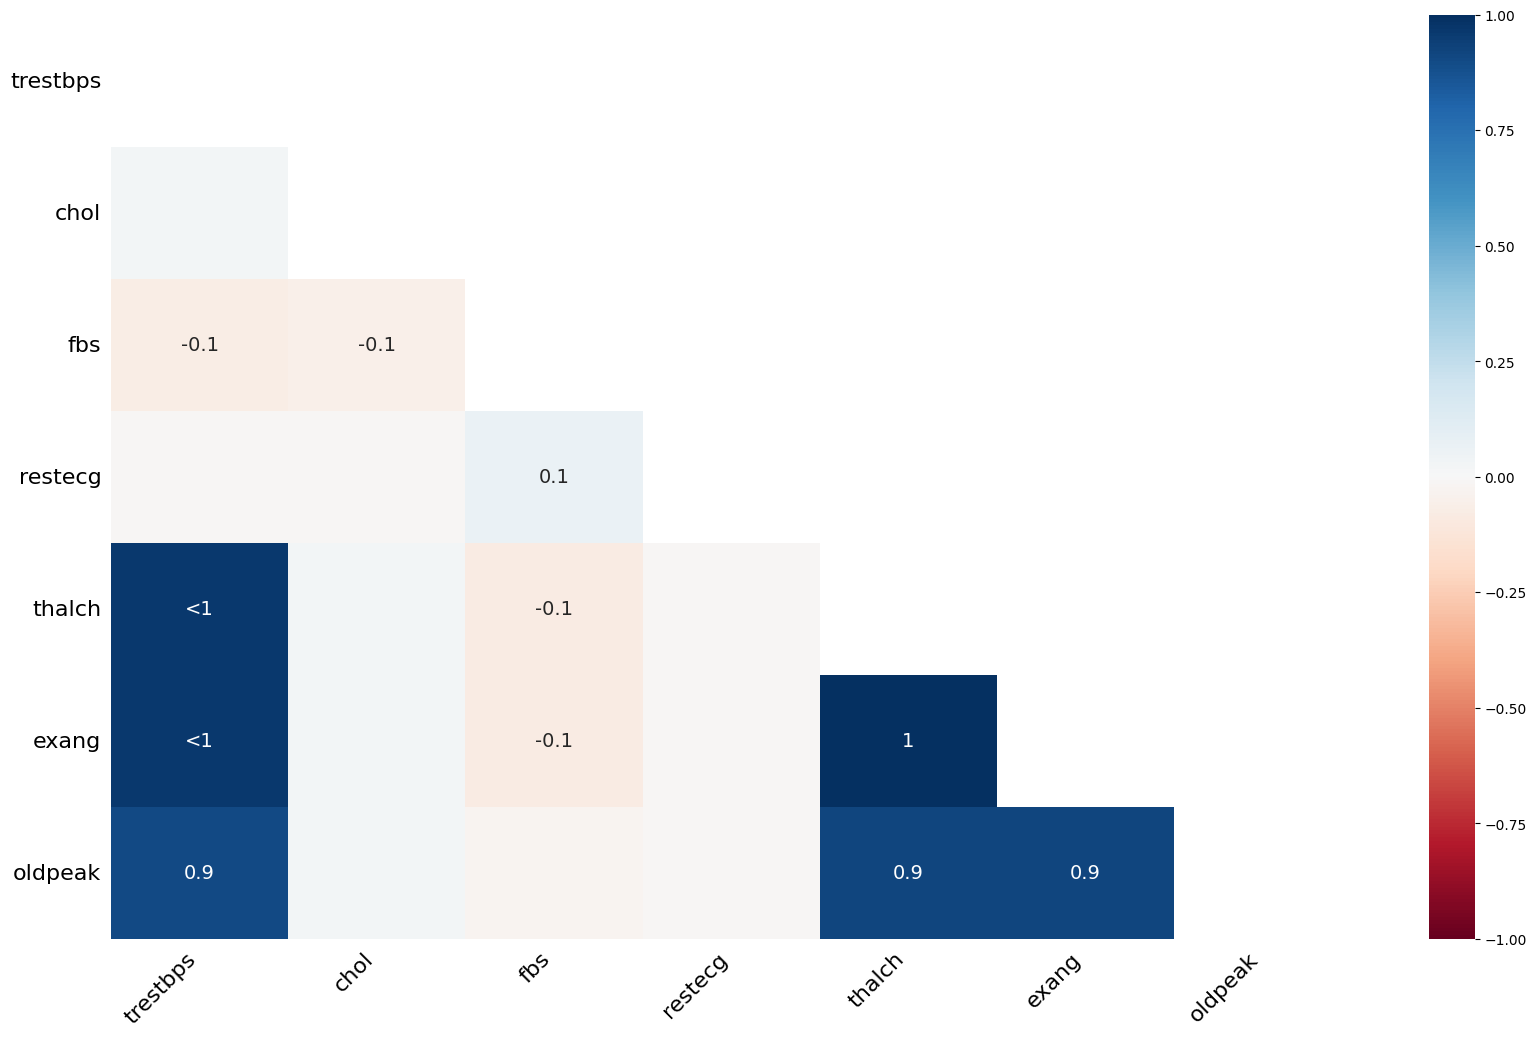

In [14]:
# missing data heatmap
msno.heatmap(df)

<Axes: >

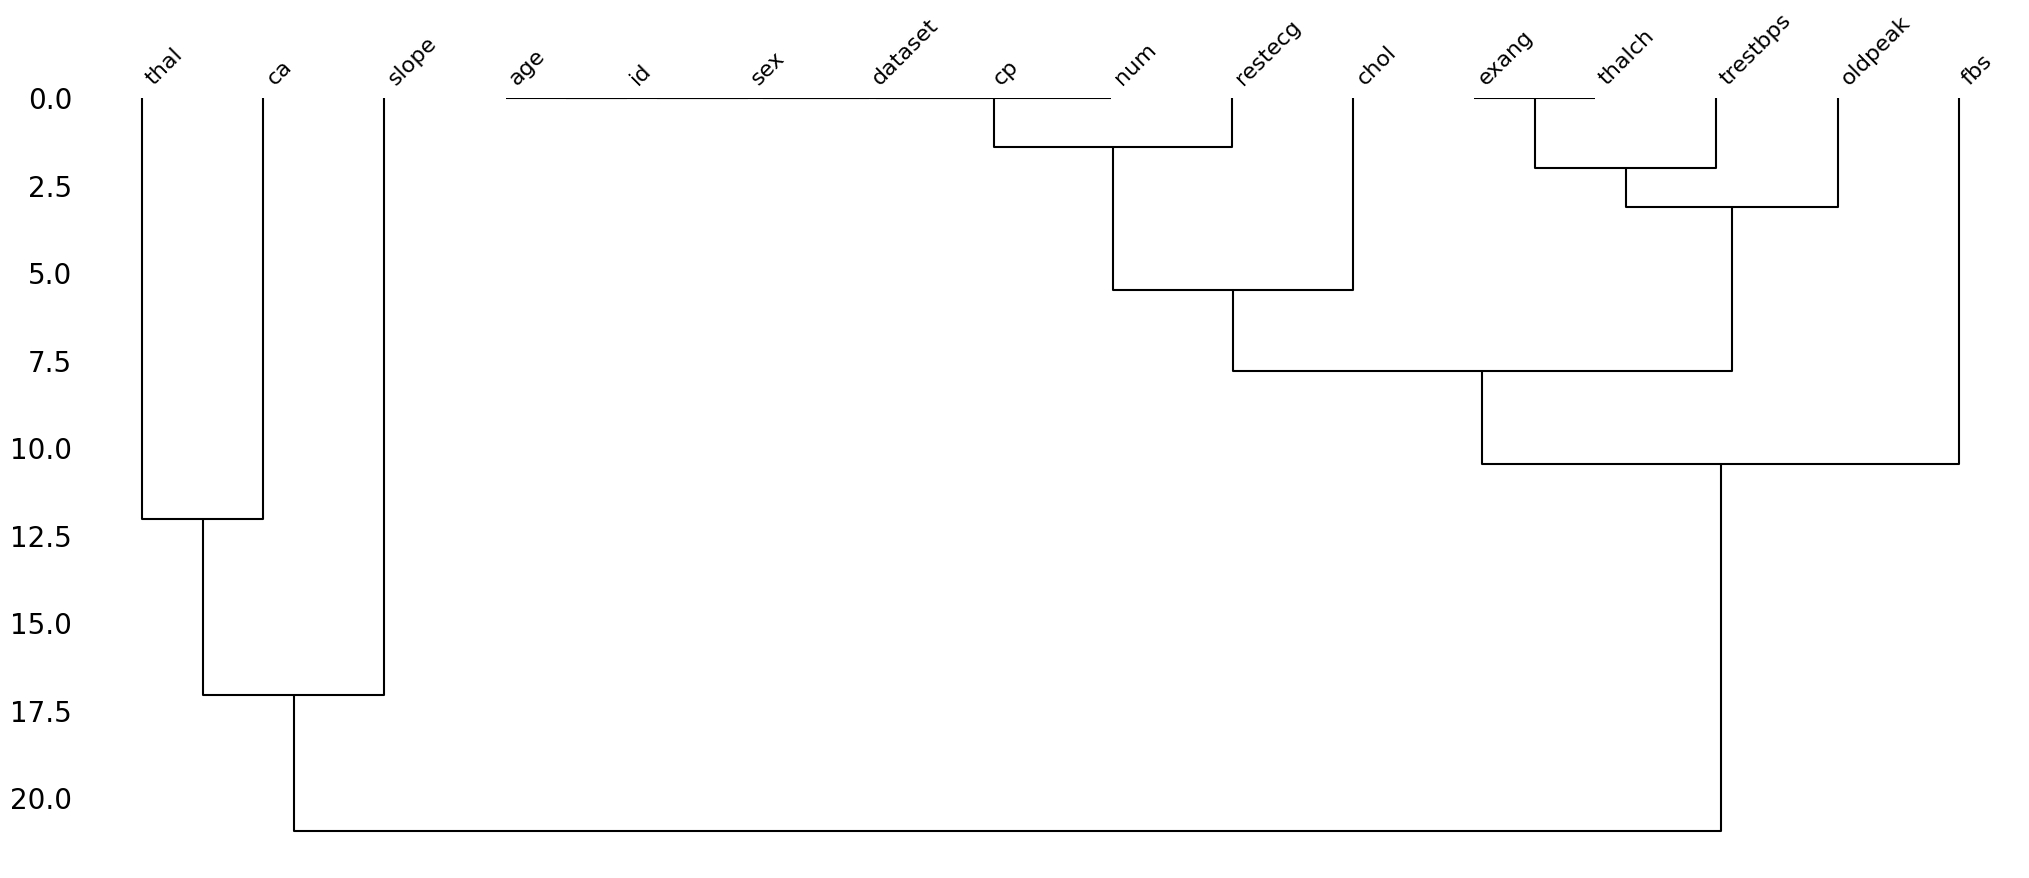

In [ ]:
# dendrogram
msno.dendrogram(df)

# **Outliers:**

An outlier is a data point that significantly deviates from the rest of the dataset. It lies far outside the typical range of values and may result from variability in the data or errors in measurement.

**Characteristics of Outliers:**

1. **Unusually High/Low Values:** They are extreme values compared to the majority of data points.

2. **Rare Occurrence:** They are typically infrequent within the dataset.

3. **Influence:** Outliers can distort statistical analyses, such as means, standard deviations, or regression models.

**Causes of Outliers:**

1. **Measurement Errors:** Mistakes in data recording or collection.

2. **Natural Variability:** Genuine, but rare, data points (e.g., exceptional events like an outlier stock market surge).

3. **Experimental Errors:** Errors due to sampling or procedural inconsistencies.

**Types of Outliers:**

1. **Univariate Outliers:** Outliers evident in a single variable.

2. **Multivariate Outliers:** Data points that deviate in relation to multiple variables (e.g., in scatter plots).

3. **Contextual Outliers:** Outliers in a specific context or time (e.g., a sudden spike in sales due to a festival).

Detecting and addressing outliers is crucial to ensure accurate insights from data analysis.

Log or square root transformations

eg.: 10  100  1000  10000

long gaps in numbers

So apply transformations: eg. log transformation

10 raised to 1  10 raised to 2 and so on

Take log of 10 raised to 1

log of a raised to b is b*log a

log of 10 = 1, log of 100 = 2, log of 1000 = 3, log of 10000 = 4

So finally above series 10  100  1000  10000 after log transfomation becomes 1  2  3  4 having no gaps

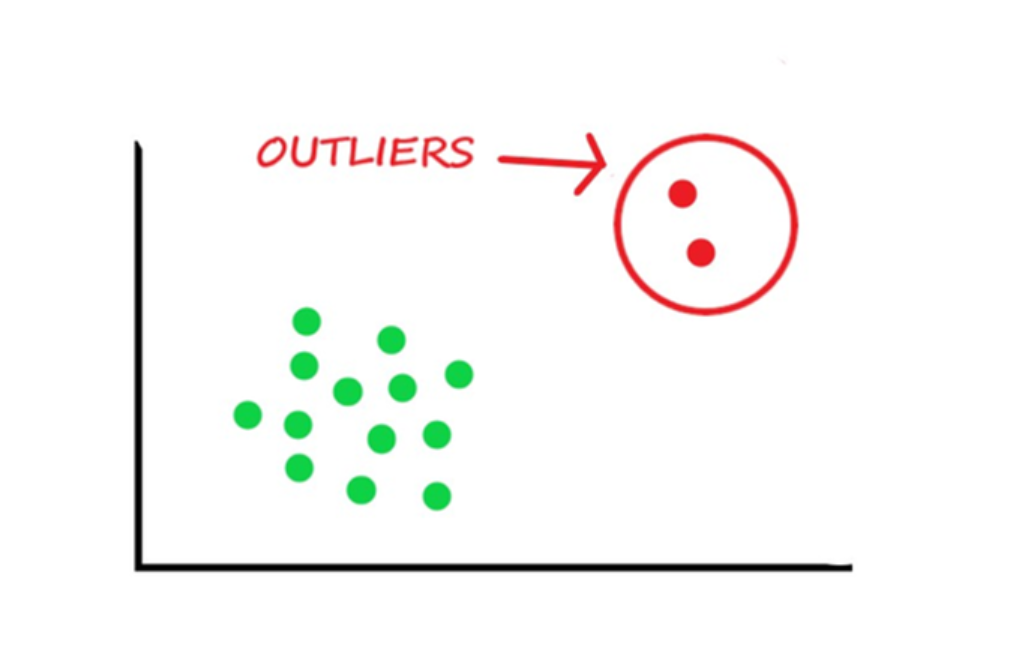

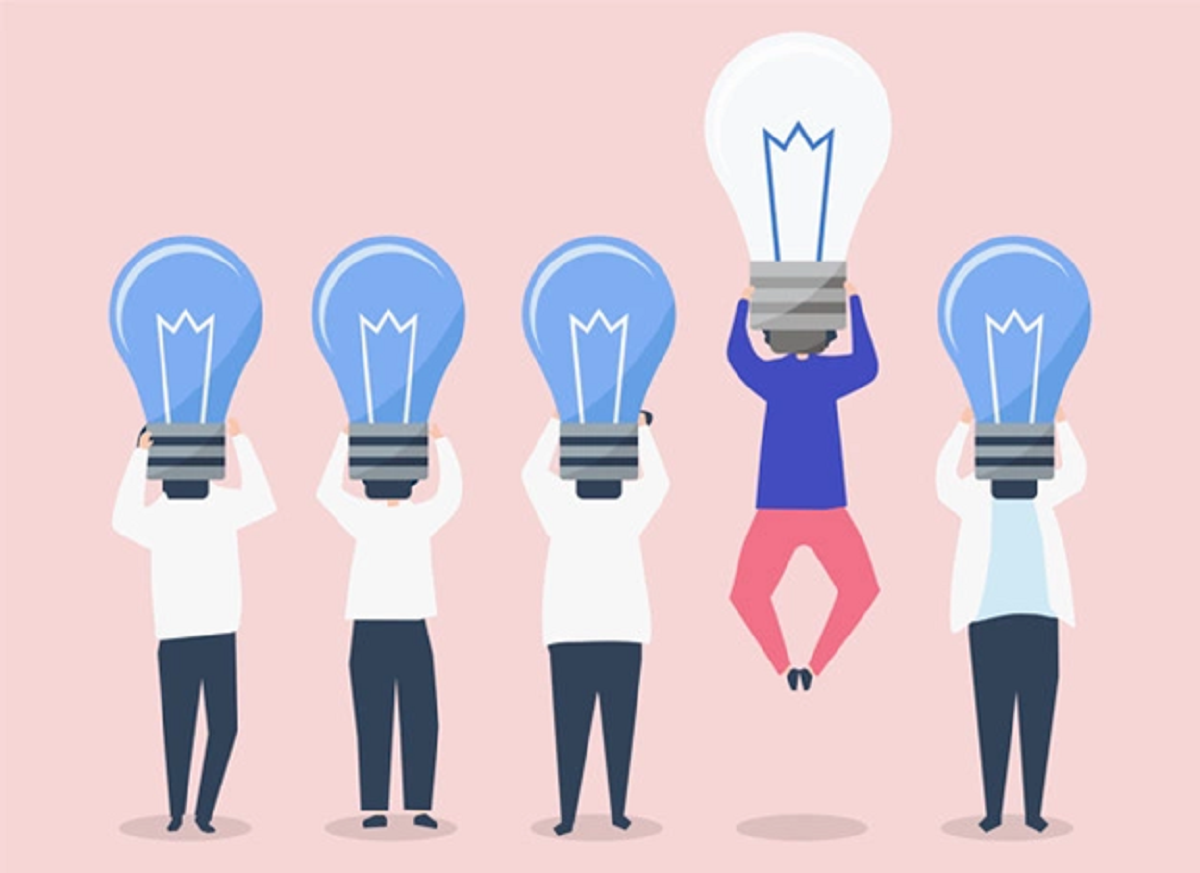

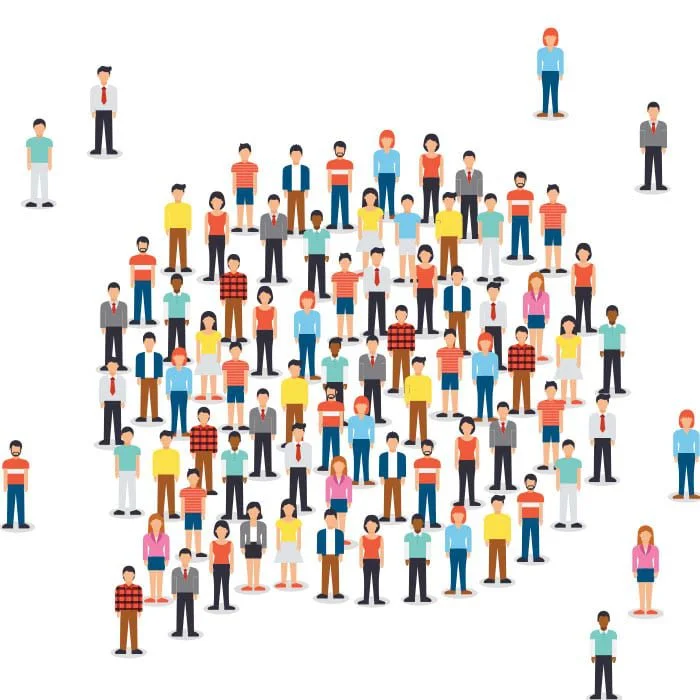

# **Outliers Detection:**

**Interquartile Range (IQR):**

      Uses the first (Q1) and third quartiles (Q3) to define a "fence."

      **Outliers:** Values below Q1 - 1.5IQR or above Q3 + 1.5IQR.

      Q1 = df['Column'].quantile(0.25)
      Q3 = df['Column'].quantile(0.75)
      IQR = Q3 - Q1
      outliers = df[(df['Column'] < (Q1 - 1.5 * IQR)) | (df['Column'] > (Q3 + 1.5 * IQR))]


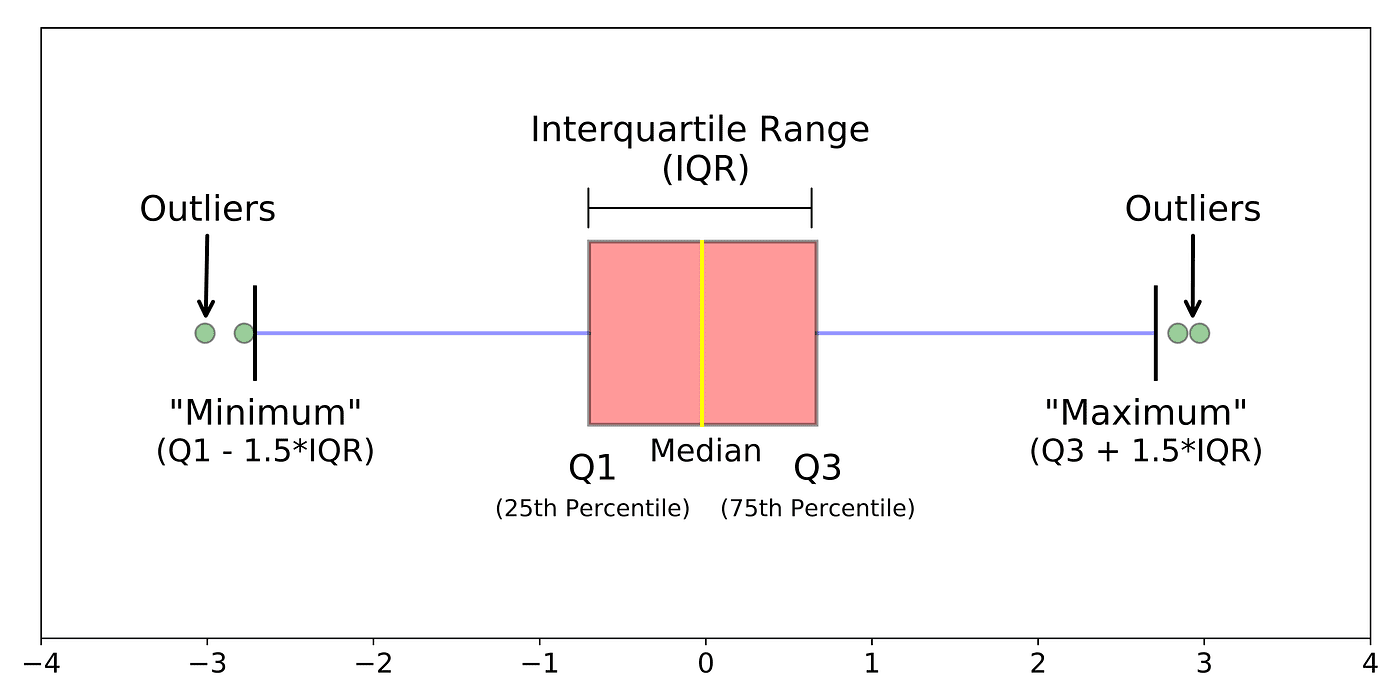

In [23]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.0,False,0.0,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.0,False,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


In [25]:
# Calculate Lower and Upper Quartile
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

# Calculate InterQuartileRange i.e. IQR
IQR = Q3 - Q1

# Calculate Upper Extreme and Lower Extreme
LE = Q1 - 1.5 * IQR
UE = Q3 + 1.5 * IQR

print("LowerEx:",LE)
print("UpperEx:",UE)


outliers = df[(df['age'] < LE) | (df['age'] > UE)]
print("Outliers: ",outliers)

Q1: 47.0
Q3: 60.0
LowerEx: 27.5
UpperEx: 79.5
Outliers:  Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, num]
Index: []


In [27]:
# Calculate Lower and Upper Quartile
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

# Calculate InterQuartileRange i.e. IQR
IQR = Q3 - Q1

# Calculate Upper Extreme and Lower Extreme
LE = Q1 - 1.5 * IQR
UE = Q3 + 1.5 * IQR

print("LowerEx:",LE)
print("UpperEx:",UE)


outliers = df[(df['chol'] < LE) | (df['chol'] > UE)]
print("Outliers: ",outliers)

Q1: 175.0
Q3: 268.0
LowerEx: 35.5
UpperEx: 407.5
Outliers: 
       id  age     sex        dataset               cp    trestbps   chol  \
48    49   65  Female      Cleveland      non-anginal  140.000000  417.0   
152  153   67  Female      Cleveland      non-anginal  115.000000  564.0   
181  182   56  Female      Cleveland     asymptomatic  134.000000  409.0   
373  374   44    Male        Hungary     asymptomatic  150.000000  412.0   
434  435   53  Female        Hungary  atypical angina  113.000000  468.0   
..   ...  ...     ...            ...              ...         ...    ...   
818  819   43    Male  VA Long Beach     asymptomatic  122.000000    0.0   
819  820   63    Male  VA Long Beach      non-anginal  130.000000    0.0   
822  823   48    Male  VA Long Beach      non-anginal  102.000000    0.0   
839  840   56    Male  VA Long Beach     asymptomatic  132.132404    0.0   
840  841   62    Male  VA Long Beach      non-anginal  132.132404    0.0   

       fbs           reste

# **Treatment to Outliers:**

Handling outliers is crucial for ensuring accurate data analysis and model performance. Here are some common techniques:


**Treatment**:

   - **Trimming**: Remove outliers if they are errors or irrelevant to your analysis.
   - **Capping**: Replace extreme values with a threshold (e.g., the 5th and 95th percentiles).
   - **Transformation**: Apply log or square root transformations to reduce the impact of outliers.
   - **Imputation**: Replace outliers with the mean or median of the dataset.

**Domain Knowledge**:
   - Understand the context of your data to decide whether an outlier is meaningful or problematic.

In [29]:
#capping of outliers

# Example dataset
data = {'values': [10, 20, 30, 1000, 40, 50, -100]}
df = pd.DataFrame(data)

# Define thresholds
lower_limit = df['values'].quantile(0.05)
upper_limit = df['values'].quantile(0.95)

print("Lower Limit: ", lower_limit)
print("Upper Limit: ", upper_limit)

# Cap the outliers
df['values'] = df['values'].clip(lower=lower_limit, upper=upper_limit)
print(df)

Lower Limit:  -67.0
Upper Limit:  714.9999999999993
   values
0      10
1      20
2      30
3     715
4      40
5      50
6     -67


# **Standard Terminology In Pandas:**

**Data Wrangling:**

Data wrangling, also known as data munging, is the process of transforming raw, messy, or unorganized data into a clean and structured format suitable for analysis. It involves preparing data for insights and decision-making by addressing issues like missing values, inconsistencies, or errors.

**Importance of Data Wrangling:**

Improves Data Quality: Ensures data is accurate, consistent, and reliable.

Enhances Efficiency: Simplifies the analysis process by providing clean and structured data.

Supports Decision-Making: Enables more accurate and actionable insights.

1.   Data Creation
2.   Data Manipulation
3.   Data Selection
4.   Data Cleaning
5.   Missing Data Handling
6.   File Operations


**Data Aggregation:**

1.  STatistical or Math Functions
2.  groupby
3.  poviting
4.  Data Reshaping